In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('../Datasets/Breast-Cancer/breast-cancer-train.csv')

df_test = pd.read_csv('../Datasets/Breast-Cancer/breast-cancer-test.csv')


In [12]:
df_test.loc[df_test['Type'] == 0]

,Unnamed: 0,Clump Thickness,Cell Size,Type
0,158,1,2,0
1,499,1,1,0
2,396,1,1,0
4,321,1,1,0
5,212,1,1,0
6,234,3,2,0
10,672,1,1,0
12,199,1,1,0
13,78,1,1,0
14,598,1,1,0


In [11]:
df_test[df_test['Type'] == 0]

,Unnamed: 0,Clump Thickness,Cell Size,Type
0,158,1,2,0
1,499,1,1,0
2,396,1,1,0
4,321,1,1,0
5,212,1,1,0
6,234,3,2,0
10,672,1,1,0
12,199,1,1,0
13,78,1,1,0
14,598,1,1,0


`df_test.loc[df_test['Type'] == 0]` 与 `df_test[df_test['Type'] == 0]`等价。

In [19]:
# 选取'Clump Thickness' 和 'Cell Size'作为特征，构建测试集的正负分类样本
df_test_negative = df_test.loc[df_test['Type'] == 0][['Clump Thickness', 'Cell Size']]
df_test_positive = df_test.loc[df_test['Type'] == 1][['Clump Thickness', 'Cell Size']]

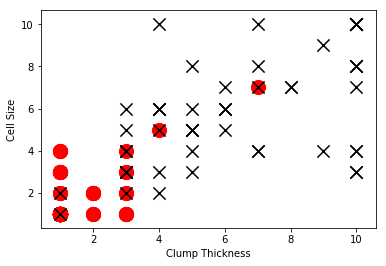

In [21]:
import matplotlib.pyplot as plt

plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')

plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

plt.show()


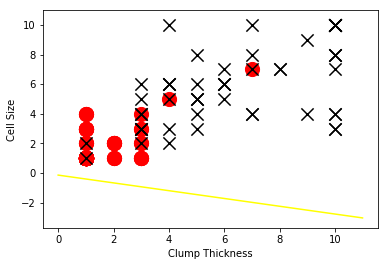

In [24]:
import numpy as np

# 随机采样直线的截距和系数
intercept = np.random.random([1])
coef = np.random.random([2])

lx = np.arange(0, 12)
ly = (-intercept - lx * coef[0]) / coef[1]

plt.plot(lx, ly, c='yellow')

plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(df_train[['Clump Thickness', 'Cell Size']][:10], df_train['Type'][:10])
print('Testing accuracy (10 training samples):', lr.score(df_test[['Clump Thickness', 'Cell Size']], df_test['Type']))

Testing accuracy (10 training samples): 0.868571428571


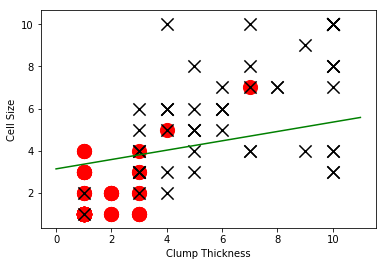

In [38]:
intercept = lr.intercept_
coef = lr.coef_[0, :]

ly = (-intercept - lx * coef[0]) / coef[1]

plt.plot(lx, ly, c='green')
plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

In [40]:
lr = LogisticRegression()

lr.fit(df_train[['Clump Thickness', 'Cell Size']], df_train['Type'])
print('Testing accuracy (all training samples):', lr.score(df_test[['Clump Thickness', 'Cell Size']], df_test['Type']))

Testing accuracy (all training samples): 0.937142857143


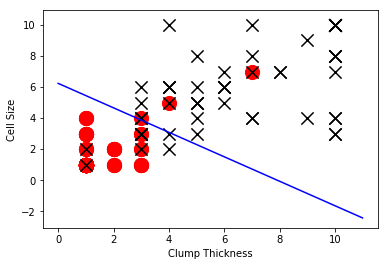

In [41]:
intercept = lr.intercept_
coef = lr.coef_[0, :]
ly = (-intercept - lx * coef[0]) / coef[1]

plt.plot(lx, ly, c='blue')
plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()